# Rubik's Cube

## Making the cube

First, we'll define the Faces and Pieces.

In [12]:
%matplotlib inline
from matplotlib.colors import ListedColormap,BoundaryNorm
import numpy as np
import matplotlib.pyplot as plt
class Face:
    RED = 0#'RED'
    BLUE = 1#'BLUE'
    WHITE = 2#'WHITE'
    ORANGE = 3#'ORANGE'
    GREEN = 4#'GREEN'
    YELLOW = 5#'YELLOW'
class Piece:
    mod = 1
    def __init__(self, faces):
        self.f = faces
        self.o = 0
    def add_orient(self, num):
        self.o = (self.o + num) % self.mod
    def ori(self):
        return self.o
    def faces(self):
        return self.f
class Corner(Piece):
    mod = 3
class Edge(Piece):
    mod = 2
class Middle(Piece):
    mod = 1
    
position = []
def reset_cube():
    try:
        Move.count = 0
    except:
        pass
    position = [Piece([])]
    position.append(Corner([Face.RED, Face.BLUE, Face.YELLOW]))
    position.append(Edge([Face.RED, Face.BLUE]))
    position.append(Corner([Face.RED, Face.WHITE, Face.BLUE]))
    position.append(Edge([Face.RED, Face.YELLOW]))
    position.append(Middle([Face.RED]))
    position.append(Edge([Face.RED, Face.WHITE]))
    position.append(Corner([Face.RED, Face.YELLOW, Face.GREEN]))
    position.append(Edge([Face.RED, Face.GREEN]))
    position.append(Corner([Face.RED, Face.GREEN, Face.WHITE]))
    position.append(Edge([Face.BLUE, Face.YELLOW]))
    position.append(Middle([Face.BLUE]))
    position.append(Edge([Face.BLUE, Face.WHITE]))
    position.append(Middle([Face.YELLOW]))
    position.append(Piece([]))
    position.append(Middle([Face.WHITE]))
    position.append(Edge([Face.GREEN, Face.YELLOW]))
    position.append(Middle([Face.GREEN]))
    position.append(Edge([Face.GREEN, Face.WHITE]))
    position.append(Corner([Face.ORANGE, Face.YELLOW, Face.BLUE]))
    position.append(Edge([Face.ORANGE, Face.BLUE]))
    position.append(Corner([Face.ORANGE, Face.BLUE, Face.WHITE]))
    position.append(Edge([Face.ORANGE, Face.YELLOW]))
    position.append(Middle([Face.ORANGE]))
    position.append(Edge([Face.ORANGE, Face.WHITE]))
    position.append(Corner([Face.ORANGE, Face.GREEN, Face.YELLOW]))
    position.append(Edge([Face.ORANGE, Face.GREEN]))
    position.append(Corner([Face.ORANGE, Face.WHITE, Face.GREEN]))
    return position
position = reset_cube()

Next up, the different Sides and how they interact with Pieces.

In [13]:
class Side:
    pieces = []
    side = []
    cmap = ListedColormap(['red', 'blue', 'white', 'orange', 'green', 'yellow'])
    norm = BoundaryNorm([0,1,2,3,4,5,6], cmap.N)
    fig_num = 0
    @classmethod
    def view_side(self):
        output = []
        for i in range(len(self.pieces)):
            x = position[self.pieces[i]]
            output.append(x.faces()[(x.ori() + self.side[i]) % x.mod])
        return output
    @classmethod
    def viz(self):
        Side.fig_num+=1
        fig = plt.figure(Side.fig_num)
        plt.title(self.__name__)
        plt.xticks([-0.5,0.5,1.5,2.5], ['','','','']);
        plt.yticks([-0.5,0.5,1.5,2.5], ['','','','']);
        plt.imshow(np.reshape(self.view_side(), (3,3)),origin='upper',interpolation='nearest',cmap=self.cmap, norm=self.norm)
        plt.grid(which='major',color='black', linestyle='-', linewidth=2)
class TopSide(Side):
    pieces = [7,8,9,4,5,6,1,2,3]
    side = [0,0,0,0,0,0,0,0,0]
class BottomSide(Side):
    pieces = [19,20,21,22,23,24,25,26,27]
    side = [0,0,0,0,0,0,0,0,0]
class FrontSide(Side):
    pieces = [1,2,3,10,11,12,19,20,21]
    side = [1,1,2,0,0,0,2,1,1]
class BackSide(Side):
    pieces = [9,8,7,18,17,16,27,26,25]
    side = [1,1,2,0,0,0,2,1,1]
class LeftSide(Side):
    pieces = [7,4,1,16,13,10,25,22,19]
    side = [1,1,2,1,0,1,2,1,1]
class RightSide(Side):
    pieces = [3,6,9,12,15,18,21,24,27]
    side = [1,1,2,1,0,1,2,1,1]

def view_cube():
    TopSide.viz()
    FrontSide.viz()
    RightSide.viz()
    BackSide.viz()
    LeftSide.viz()
    BottomSide.viz()
def validate():
    a = TopSide.view_side()
    b = FrontSide.view_side()
    c = RightSide.view_side()
    d = BackSide.view_side()
    e = LeftSide.view_side()
    f = BottomSide.view_side()
    return a.count(a[0]) == len(a) and b.count(b[0]) == len(b) and c.count(c[0]) == len(c) \
            and d.count(d[0]) == len(d) and e.count(e[0]) == len(e) and f.count(f[0]) == len(f)

Then, we define the Moves of a Rubik's Cube.

In [14]:
class Move:
    pos_list = [0,0,0,0,0,0,0,0]
    orient_adjust = [0,0,0,0,0,0,0,0]
    count = 0
    @classmethod
    def run(self, num=1):
        for i in range(num%4):
            self.reorient()
            self.swap()
            Move.count += 1
    @classmethod
    def reorient(self):
        for i in range(len(self.pos_list)):
            position[self.pos_list[i]].add_orient(self.orient_adjust[i])
    @classmethod
    def swap(self):
        a6 = position[self.pos_list[6]]
        a7 = position[self.pos_list[7]]
        for i in range(len(self.pos_list)-2):
            position[self.pos_list[7-i]] = position[self.pos_list[5-i]]
        position[self.pos_list[0]] = a6
        position[self.pos_list[1]] = a7
class LU_Move(Move):
    pos_list = [1,4,7,16,25,22,19,10]
    orient_adjust = [1,0,-1,0,1,0,-1,0]
class MU_Move(Move):
    pos_list = [2,5,8,17,26,23,20,11]
    orient_adjust = [1,0,1,0,1,0,1,0]
class RU_Move(Move):
    pos_list = [3,6,9,18,27,24,21,12]
    orient_adjust = [-1,0,1,0,-1,0,1,0]
class TL_Move(Move):
    pos_list = [1,4,7,8,9,6,3,2]
    orient_adjust = [0,0,0,0,0,0,0,0]
class ML_Move(Move):
    pos_list = [10,13,16,17,18,15,12,11]
    orient_adjust = [1,0,1,0,1,0,1,0]
class BL_Move(Move):
    pos_list = [19,22,25,26,27,24,21,20]
    orient_adjust = [0,0,0,0,0,0,0,0]
class RLU_Move(Move):
    pos_list = [1,10,19,20,21,12,3,2]
    orient_adjust = [-1,1,1,1,-1,1,1,1]
class RMU_Move(Move):
    pos_list = [4,13,22,23,24,15,6,5]
    orient_adjust = [1,0,1,0,1,0,1,0]
class RRU_Move(Move):
    pos_list = [7,16,25,26,27,18,9,8]
    orient_adjust = [1,1,-1,1,1,1,-1,1]
def RotateDown(num=1):
    for i in range(num%4):
        LU_Move.run();MU_Move.run();RU_Move.run()
def RotateRight(num=1):
    for i in range(num%4):
        TL_Move.run();ML_Move.run();BL_Move.run()
def RotateCC(num=1): #counter-clockwise
    for i in range(num%4):
        RLU_Move.run();RMU_Move.run();RRU_Move.run()

def mixup(n=100):
    moves = [LU_Move,MU_Move,RU_Move,TL_Move,ML_Move,BL_Move,RLU_Move,RMU_Move,RRU_Move]
    for i in range(n):
        moves[np.random.randint(9)].run()

## Solving the cube

This is the algorithm I use to solve a Rubik's Cube. 

In [15]:
def find_piece(faces):
    for i in range(len(position)):
        if set(position[i].faces()) == set(faces):
            return i
def solve():
    while (not validate()):
        print("Checking...")
        for i in range(4):
            RotateRight()
            solve_topcross()
        for i in range(4):
            RotateRight()
            solve_topcorners() 
        for i in range(4):
            RotateRight()
            solve_middle()
        solve_bottomcornerswap()
        solve_bottomcornerorient()
        solve_bottomcross()
        RotateDown()
    print("Solved! Total number of moves: " + str(Move.count))
    return 'Solved!'
def solve_topcross():
    topface = TopSide.view_side()
    frontface = FrontSide.view_side()
    topcolor = topface[4]
    frontcolor = frontface[4]
    if (topface[7] != topcolor or frontface[1] != frontcolor):
        piece_index = find_piece([topcolor,frontcolor]) 
        if piece_index in [2,6,8,4]:
            on_top = [2,6,8,4].index(piece_index)
            RotateRight(on_top)
            run_topcross_algorithm(False)
            RotateRight(4-on_top)
        piece_index = find_piece([topcolor,frontcolor]) 
        if piece_index in [12,10,16,18]:
            in_middle = [12,10,16,18].index(piece_index)
            RotateRight(4-in_middle)
            run_middle_algorithm(False)
            RotateRight(in_middle)
        piece_index = find_piece([topcolor,frontcolor]) 
        alt = (position[piece_index].faces()[position[piece_index].ori()] == frontcolor) #alt is not double-flip
        num_bl_moves = [20,24,26,22].index(piece_index)
        BL_Move.run(num_bl_moves)
        run_topcross_algorithm(alt)
    assert (TopSide.view_side()[7] == topcolor and FrontSide.view_side()[1] == frontcolor), 'topcross solver didnt work' 
def run_topcross_algorithm(alt=False):
    if alt:
        RLU_Move.run(3)
        ML_Move.run(3)
        RLU_Move.run()
        ML_Move.run()
    else:
        RLU_Move.run(2)
def solve_topcorners():
    for i in range(4):
        topface = TopSide.view_side()
        frontface = FrontSide.view_side()
        rightface = RightSide.view_side()
        topcolor = topface[4]
        frontcolor = frontface[4]
        rightcolor = rightface[4]
        if (topface[8] != topcolor or frontface[2] != frontcolor or rightface[0] != rightcolor):
            piece_index = find_piece([frontcolor,rightcolor,topcolor])
            if piece_index in [3,1,7,9]:
                on_top = [3,1,7,9].index(piece_index)
                RotateRight(4-on_top)
                run_topcorners_algorithm(False)
                RotateRight(on_top)
            piece_index = find_piece([frontcolor,rightcolor,topcolor])
            alt = (position[piece_index].faces()[position[piece_index].ori()] == rightcolor) #alt is right face to top
            num_bl_moves = [21,27,25,19].index(piece_index)
            BL_Move.run(num_bl_moves)
            run_topcorners_algorithm(alt)
    topface = TopSide.view_side()
    frontface = FrontSide.view_side()
    rightface = RightSide.view_side()
    assert (topface[8] == topcolor and frontface[2] == frontcolor and rightface[0] == rightcolor), \
            'topcorners solver didnt work' 
def run_topcorners_algorithm(alt=False):
    if alt:
        BL_Move.run(1)
        RU_Move.run(3)
        BL_Move.run(3)
        RU_Move.run(1)
    else:
        RLU_Move.run(3)
        BL_Move.run(3)
        RLU_Move.run(1)                  
def solve_middle():
    frontface = FrontSide.view_side()
    rightface = RightSide.view_side()
    frontcolor = frontface[4]
    rightcolor = rightface[4]
    if (frontface[5] != frontcolor or rightface[3] != rightcolor):
        piece_index = find_piece([frontcolor,rightcolor]) 
        if piece_index in [12,10,16,18]:
            in_middle = [12,10,16,18].index(piece_index)
            RotateRight(4-in_middle)
            run_middle_algorithm(False)
            RotateRight(in_middle)
        piece_index = find_piece([frontcolor,rightcolor]) 
        alt = (position[piece_index].faces()[position[piece_index].ori()] == rightcolor) #alt is right face to front middle
        num_bl_moves = ([20,24,26,22].index(piece_index) - int(alt))
        BL_Move.run(num_bl_moves)
        run_middle_algorithm(alt)
    frontface = FrontSide.view_side()
    rightface = RightSide.view_side()
    assert (frontface[5] == frontcolor and rightface[3] == rightcolor), 'middle solver didnt work'+str(alt) 
def run_middle_algorithm(alt=False):
    if alt:
        BL_Move.run(2)
        RU_Move.run(3)
        BL_Move.run(1)
        RU_Move.run(1)
        BL_Move.run(3)
        RLU_Move.run(3)
        BL_Move.run(3)
        RLU_Move.run(1)
    else:
        BL_Move.run(2)
        RLU_Move.run(3)
        BL_Move.run(1)
        RLU_Move.run(1)
        BL_Move.run(1)
        RU_Move.run(3)
        BL_Move.run(3)
        RU_Move.run(1)   
def solve_bottomcornerswap(): #swap corners
    bottomcolor = BottomSide.view_side()[4]
    frontcolor = FrontSide.view_side()[4]
    backcolor = BackSide.view_side()[4]
    rightcolor = RightSide.view_side()[4]
    leftcolor = LeftSide.view_side()[4]
    corners = [find_piece([frontcolor,bottomcolor,rightcolor]),find_piece([backcolor,bottomcolor,rightcolor]), \
               find_piece([backcolor,bottomcolor,leftcolor]),find_piece([frontcolor,bottomcolor,leftcolor])] #[21,27,25,19]
    num_bl_moves =  ([21,27,25,19].index(corners[0]))
    BL_Move.run(num_bl_moves) #first element lines up
    corners = [find_piece([frontcolor,bottomcolor,rightcolor]),find_piece([backcolor,bottomcolor,rightcolor]), \
               find_piece([backcolor,bottomcolor,leftcolor]),find_piece([frontcolor,bottomcolor,leftcolor])] #[21,27,25,19]
    if (corners[1] == 19):
        RotateRight(3)
        run_bottomcornerswap_algorithm()
        RotateRight(1)
        x = corners.index(25)
        corners[x],corners[1] = corners[1],corners[x]
    if (corners[1] == 25):
        RotateRight(2)
        run_bottomcornerswap_algorithm()
        RotateRight(2)
        x = corners.index(27)
        corners[x],corners[1] = corners[1],corners[x] #second element lines up
    if (corners[2] == 19):
        RotateRight(3)
        run_bottomcornerswap_algorithm()
        RotateRight(1)
        x = corners.index(25)
        corners[x],corners[2] = corners[2],corners[x] #third element lines up
    assert corners == [21,27,25,19], 'something went wrong with my logic, bottomcornerswap' + str(corners)
    corners = [find_piece([frontcolor,bottomcolor,rightcolor]),find_piece([backcolor,bottomcolor,rightcolor]), \
               find_piece([backcolor,bottomcolor,leftcolor]),find_piece([frontcolor,bottomcolor,leftcolor])] #[21,27,25,19]
    assert corners == [21,27,25,19], 'bottomcornerswap solver not working' + str(corners)
def run_bottomcornerswap_algorithm():
    RU_Move.run(3)
    BL_Move.run(1)
    RU_Move.run(1)
    RLU_Move.run(3)
    BL_Move.run(3)
    RLU_Move.run(1)
    RU_Move.run(3)
    BL_Move.run(3)
    RU_Move.run(1)
    BL_Move.run(2)
def solve_bottomcornerorient():
    bottomcolor = BottomSide.view_side()[4]
    frontcolor = FrontSide.view_side()[4]
    backcolor = BackSide.view_side()[4]
    rightcolor = RightSide.view_side()[4]
    leftcolor = LeftSide.view_side()[4]
    
    corners = [find_piece([frontcolor,bottomcolor,rightcolor]),find_piece([backcolor,bottomcolor,rightcolor]), \
               find_piece([backcolor,bottomcolor,leftcolor]),find_piece([frontcolor,bottomcolor,leftcolor])] #[21,27,25,19]
    orients = [(position[i].faces()[position[i].ori()] == bottomcolor) for i in corners]
    if orients.count(True) == 4:
        return True
    while orients.count(True) != 1:
        if orients.count(True) > 1:
            while ((FrontSide.view_side()[8]) == FrontSide.view_side()[4]):
                RotateRight()
        run_bottomcornerorient_algorithm()
        orients = [(position[i].faces()[position[i].ori()] == bottomcolor) for i in corners]
    RotateRight(orients.index(True))
    for a in range(2):
        if orients.count(True) != 4:    
            run_bottomcornerorient_algorithm()
            orients = [(position[i].faces()[position[i].ori()] == bottomcolor) for i in corners]
    assert(orients.count(True) == 4), 'bottomcornerorient solver not working'
def run_bottomcornerorient_algorithm():
    RRU_Move.run(3)
    BL_Move.run(1)
    RRU_Move.run(1)
    BL_Move.run(1) 
    RRU_Move.run(3)
    BL_Move.run(2)
    RRU_Move.run(1)
    BL_Move.run(2)
def solve_bottomcross():
    bottomface = BottomSide.view_side()
    frontface = FrontSide.view_side()
    backface = BackSide.view_side()
    rightface = RightSide.view_side()
    leftface = LeftSide.view_side()
    bottomcolor = bottomface[4]
    frontcolor = frontface[4]
    backcolor = backface[4]
    rightcolor = rightface[4]
    leftcolor = leftface[4]
    num_done = int(frontface.count(frontcolor) == len(frontface)) + \
                int(backface.count(backcolor) == len(backface)) + \
                int(rightface.count(rightcolor) == len(rightface)) + \
                int(leftface.count(leftcolor) == len(leftface))
    cross = [find_piece([frontcolor,bottomcolor]),find_piece([bottomcolor,rightcolor]), \
           find_piece([backcolor,bottomcolor]),find_piece([bottomcolor,leftcolor])] #[20,24,26,22]
    orients = [(position[i].faces()[position[i].ori()] == bottomcolor) for i in cross]
    if num_done == 4:
        return True #done!
    if num_done == 0:     #beginning of stage
        if (cross[0] == 24 and not orients[0]) or (cross[0] == 26 and orients[0]):
            RotateRight(3)
        elif (cross[1] == 26 and not orients[1]) or (cross[1] == 22 and orients[1]):
            pass
        elif (cross[2] == 22 and not orients[2]) or (cross[2] == 20 and orients[2]):
            RotateRight(1)
        elif (cross[3] == 20 and not orients[3]) or (cross[3] == 24 and orients[3]):
            RotateRight(2)
        else:
            if (cross[0] == 26):
                pass
            elif (cross[1] == 22):
                RotateRight(1)
            elif (cross[2] == 20):
                RotateRight(2)
            elif (cross[3] == 24):
                RotateRight(3)
            RotateDown()
            RLU_Move.run(3)
            ML_Move.run(3)
            RLU_Move.run(1)
            ML_Move.run(1)
            RotateDown(3)
            return False #needs middle swap. if logic error, print these: str(num_done)+str(orients)+str(cross)
    else:
        while (FrontSide.view_side().count(FrontSide.view_side()[0]) != 9):
            RotateRight()
        if num_done == 1 and orients.count(True) != 4:
            return False
    run_bottomcross_algorithm()
    solve_bottomcross()
    
def run_bottomcross_algorithm():
    LU_Move.run()
    RU_Move.run()
    RLU_Move.run()
    LU_Move.run(3)
    RU_Move.run(3)
    BL_Move.run(2)
    LU_Move.run()
    RU_Move.run()
    RLU_Move.run()
    LU_Move.run(3)
    RU_Move.run(3)

# Now let's play!

## Viewing the Cube

You can play with the cube by executing moves, and view it by running ```view_cube()```.

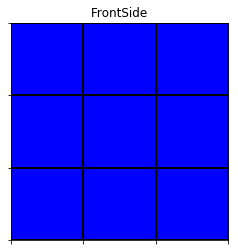

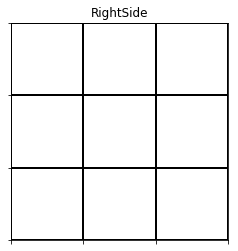

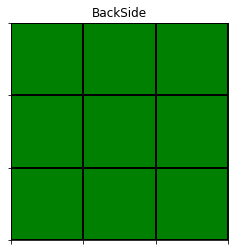

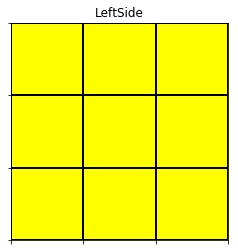

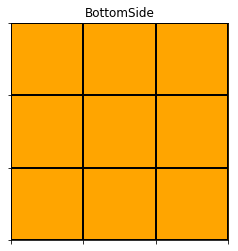

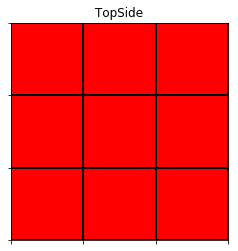

In [20]:
position=reset_cube()
view_cube()


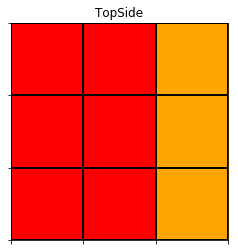

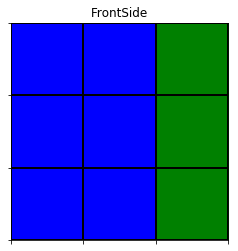

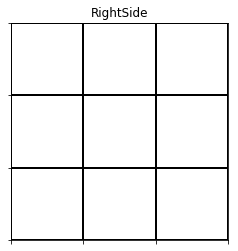

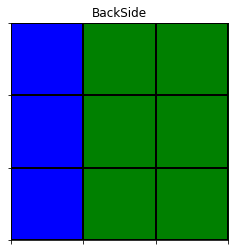

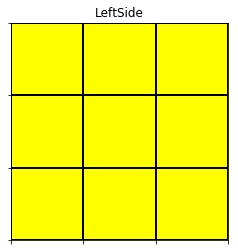

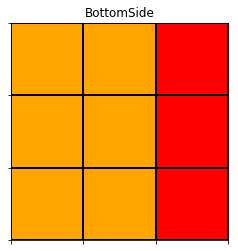

In [21]:
RU_Move.run(2)
view_cube()

## Mixing up the Cube 
```mixup(n)``` runs _n_ random moves on the cube. It's like mixing the cube up!

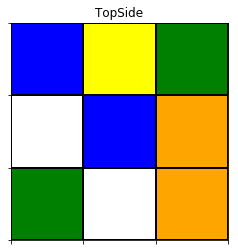

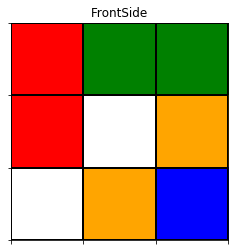

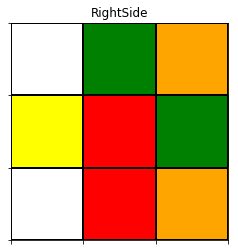

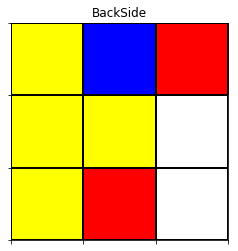

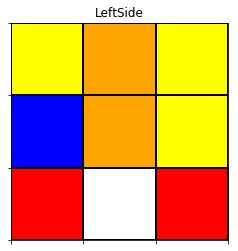

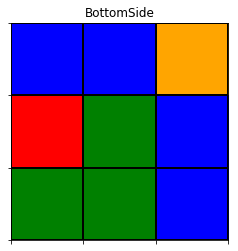

In [22]:
position=reset_cube()
mixup(100)
view_cube()

## Solving the Cube

```solve()``` will run an algorithm to finish the cube.

Solved! Total number of moves: 556
CPU times: user 350 µs, sys: 134 µs, total: 484 µs
Wall time: 384 µs


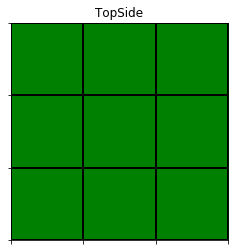

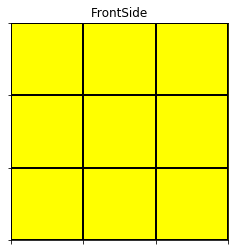

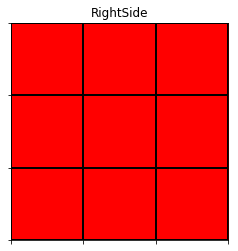

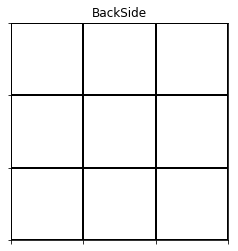

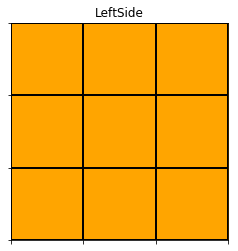

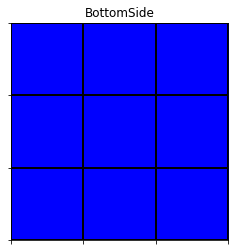

In [24]:
%time solve() #magic %time command to time the function
view_cube()

Let's mix it up and try again.

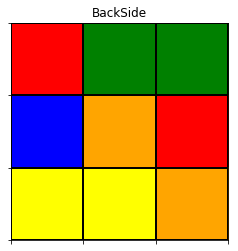

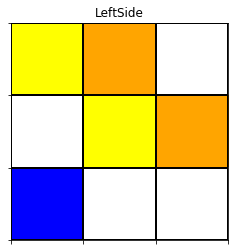

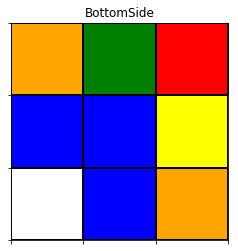

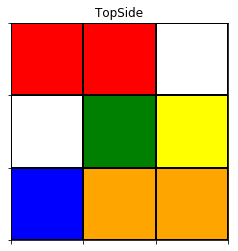

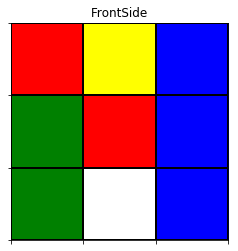

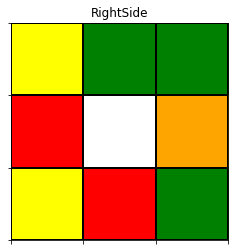

In [25]:
position = reset_cube()
mixup(1000)
view_cube()

Checking...
Checking...
Solved! Total number of moves: 1503


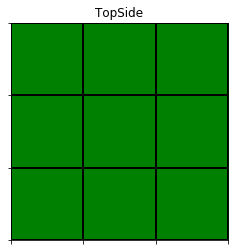

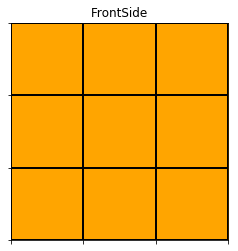

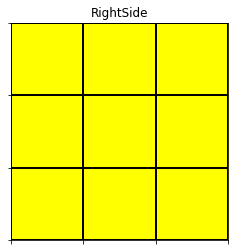

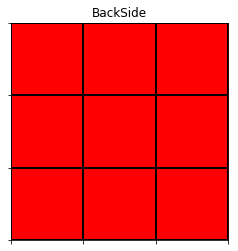

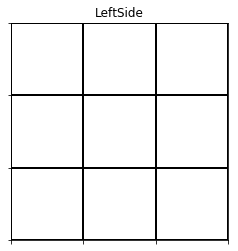

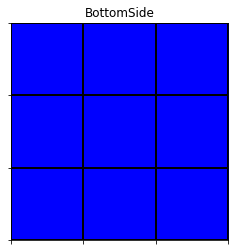

In [11]:
solve()
view_cube()

## Try your own

Now you try! Have fun :)

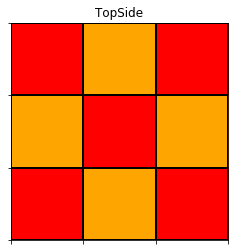

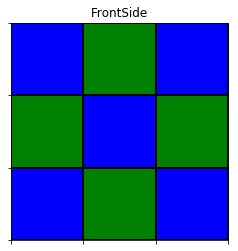

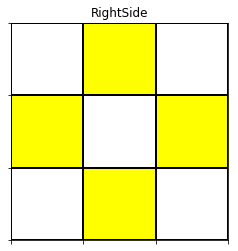

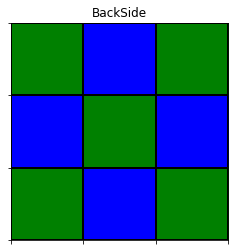

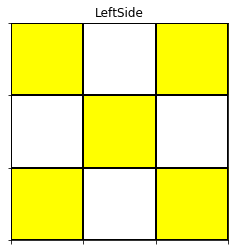

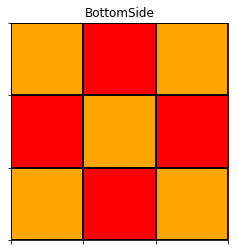

In [35]:
position = reset_cube()
MU_Move.run(2)
ML_Move.run(2)
RMU_Move.run(2)
view_cube()